In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from scipy import sparse

In [2]:
N = 200
X, Y = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))
#creates 200x200 2d grid

In [3]:
#create potential, this is for a harmonic oscillator
def potential(x,y):
    return 0.5*((x-0.5)**2+(y-0.5)**2)
V = potential(X,Y)

In [4]:
#Now we create hamiltionian matrix; H = T + U. T = laplacian operator, 
#i.e that kronecker sum. U is the potential we just defined.
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
#this d is basically like our one d laplace operator, but now we need a kronsum to make it 2d
T = -1/2 * sparse.kronsum(D,D)
#now we create a matrix for the potential and add the two components of the energy
U = sparse.diags(V.reshape(N**2), (0))
H = T + U

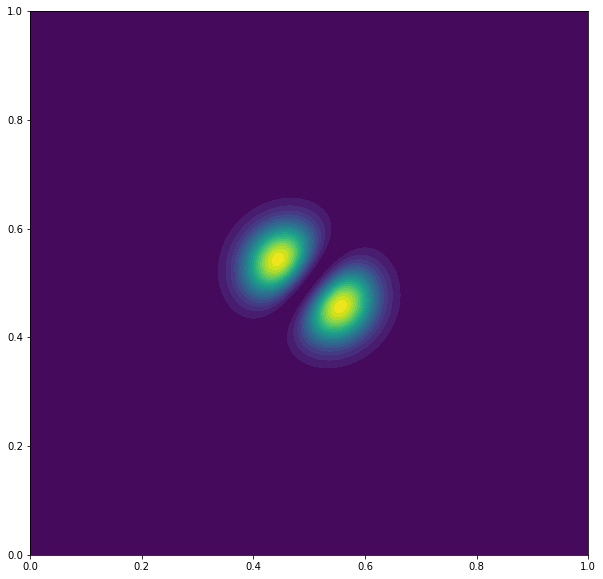

In [5]:
#now we are ready to solve the eigenvalue equation

eigenvalues, eigenvectors = eigsh(H, k=10, which='SM')
def evectors(n):
    return eigenvectors.T[n].reshape((N,N))

#now that we have them lets plot them
plt.figure(figsize=(10,10))
plt.contourf(X, Y, evectors(1)**2, 20)
#plt.contourf(X, Y, evectors(2)**2, 20)
#plt.contourf(X, Y, evectors(3)**2, 20)
#plt.contourf(X, Y, evectors(4)**2, 20)

In [6]:
#cool animation
#eigenplot = plt.get_cmap('cool')
#
#def init():
    # Plot the surface.
 #   ax.plot_surface(X, Y, evectors(1)**2, cmap=my_cmap,linewidth=0, antialiased=False)
  #  ax.set_xlabel('x')
   # ax.set_ylabel('y')
    #ax.set_zlabel('psi**2')
    #return fig,


#def animate(i):
  #  ax.view_init(elev=10, azim=4*i)
   # return fig,

#fig = plt.figure()

#ani = animation.FuncAnimation(fig, animate, init_func=init,frames=90, interval=50)
#ani.save('rotate_azimuth_angle_3d_surf.gif',writer='pillow',fps=20)